# Loading the data

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [9]:
max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train))
print(len(input_test))

25000
25000


In [10]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [12]:
print(input_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  

# Training the model with Embedding and SimpleRNN layers

In [4]:
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential

In [13]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 15s - loss: 0.6658 - acc: 0.5908 - val_loss: 0.5598 - val_acc: 0.7756
Epoch 2/10
20000/20000 [==============================] - 15s - loss: 0.4190 - acc: 0.8246 - val_loss: 0.4422 - val_acc: 0.8000
Epoch 3/10
20000/20000 [==============================] - 15s - loss: 0.3006 - acc: 0.8769 - val_loss: 0.4351 - val_acc: 0.8198
Epoch 4/10
20000/20000 [==============================] - 15s - loss: 0.2204 - acc: 0.9140 - val_loss: 0.5155 - val_acc: 0.7590
Epoch 5/10
20000/20000 [==============================] - 14s - loss: 0.1496 - acc: 0.9461 - val_loss: 0.5370 - val_acc: 0.7512
Epoch 6/10
20000/20000 [==============================] - 15s - loss: 0.0947 - acc: 0.9683 - val_loss: 0.4404 - val_acc: 0.8492
Epoch 7/10
20000/20000 [==============================] - 15s - loss: 0.0579 - acc: 0.9825 - val_loss: 0.5044 - val_acc: 0.8338
Epoch 8/10
20000/20000 [==============================]

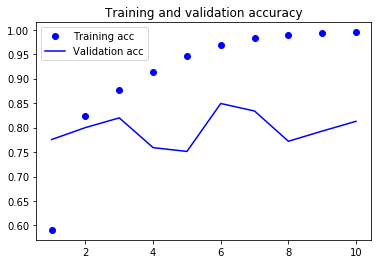

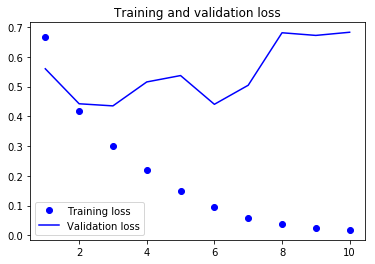

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Using LSTM layers

In [17]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 83s - loss: 0.5124 - acc: 0.7551 - val_loss: 0.3735 - val_acc: 0.8494
Epoch 2/10
20000/20000 [==============================] - 80s - loss: 0.2894 - acc: 0.8881 - val_loss: 0.2863 - val_acc: 0.8880
Epoch 3/10
20000/20000 [==============================] - 80s - loss: 0.2355 - acc: 0.9109 - val_loss: 0.3675 - val_acc: 0.8382
Epoch 4/10
20000/20000 [==============================] - 80s - loss: 0.1961 - acc: 0.9290 - val_loss: 0.3898 - val_acc: 0.8716
Epoch 5/10
20000/20000 [==============================] - 80s - loss: 0.1824 - acc: 0.9325 - val_loss: 0.3277 - val_acc: 0.8624
Epoch 6/10
20000/20000 [==============================] - 80s - loss: 0.1549 - acc: 0.9457 - val_loss: 0.2928 - val_acc: 0.8848
Epoch 7/10
20000/20000 [==============================] - 80s - loss: 0.1468 - acc: 0.9476 - val_loss: 0.3094 - val_acc: 0.8734
Epoch 8/10
20000/20000 [==============================]

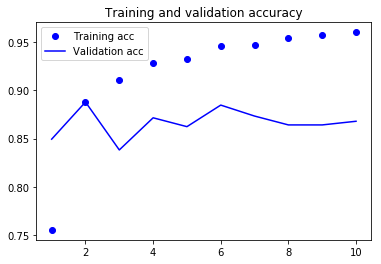

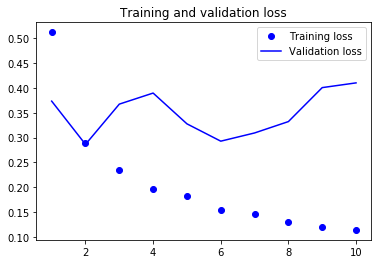

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()